In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
## Load the csv file
df = pd.read_csv('./train.csv')

## View the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape


(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#checking duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [6]:
# Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [7]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
## Preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('./train.csv', keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [9]:
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [12]:
## View the statistical description of the numerical columns
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
## Check for missing values
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [14]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

## Analysis of Data

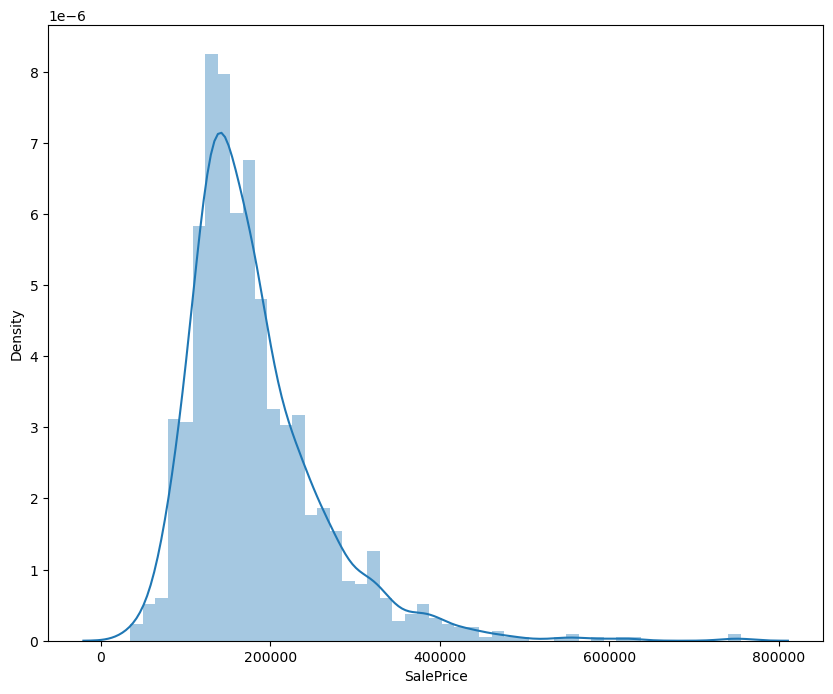

In [15]:
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

##### it can be observed that the target variable "SalePrice" is skewed to the right

In [16]:
## Checking the skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

Since the value of skew is greater than one , it is highly skewed

In [17]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])
df['SalePrice'].skew()


0.12133506220520406

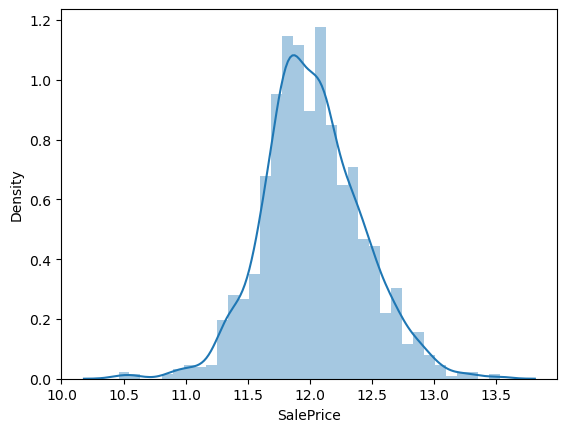

In [18]:
## Plot the spread of transformed target variable
sns.distplot(df['SalePrice']);

In [19]:
## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


In [20]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


In [21]:
#Checking for outlier in the numerical columns
df_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.535376
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,12.694958
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,13.000323


In [22]:
#Most of the columns have outliers. So, we will require to do Outlier treatment

Checking all the values available in categorical columns 

In [23]:
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 


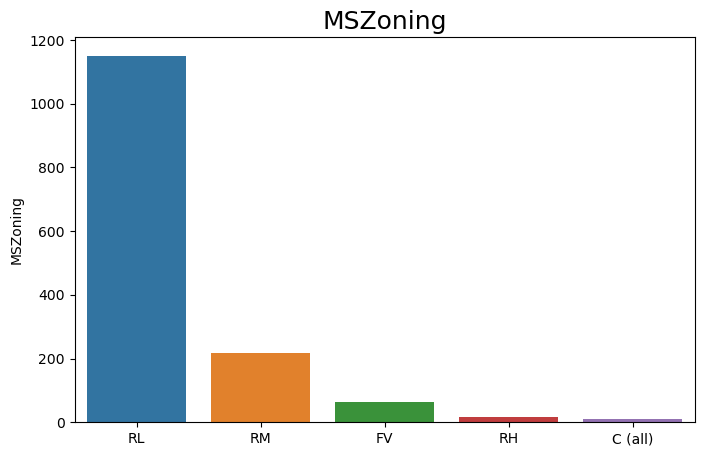

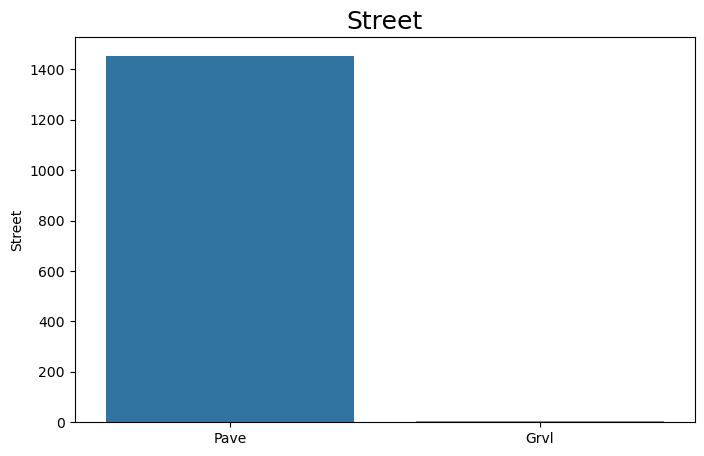

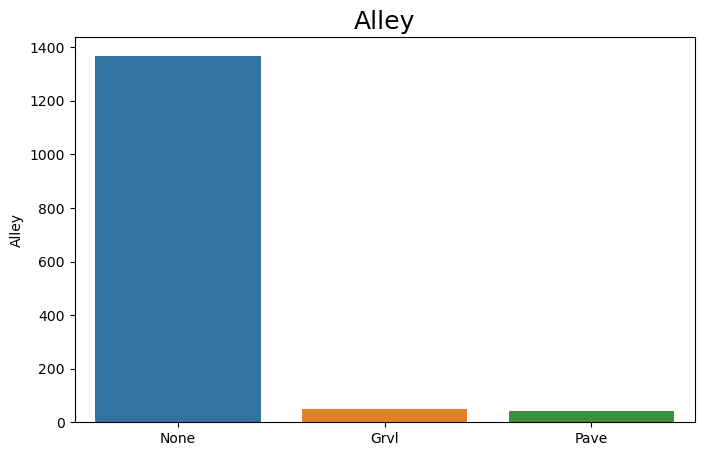

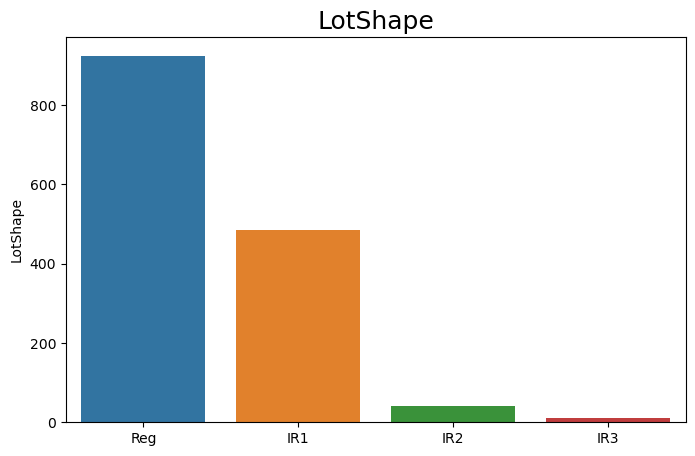

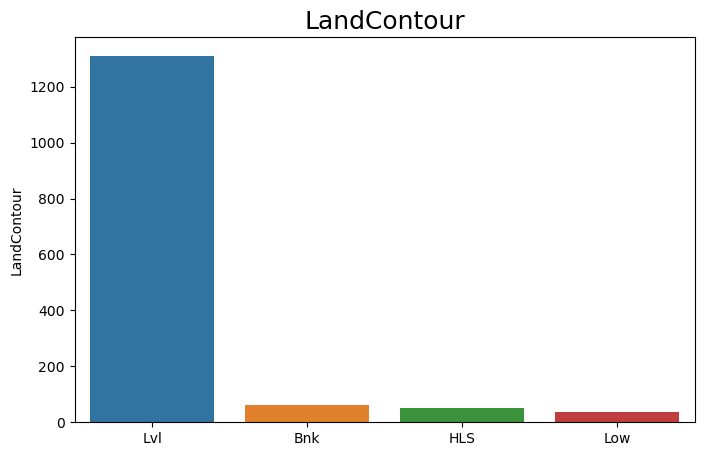

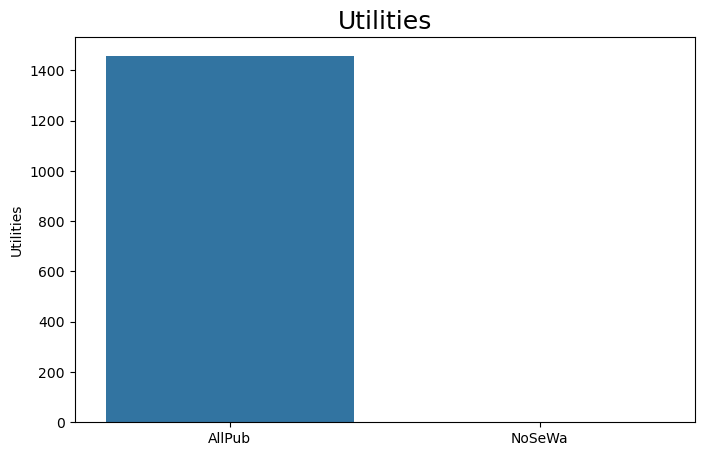

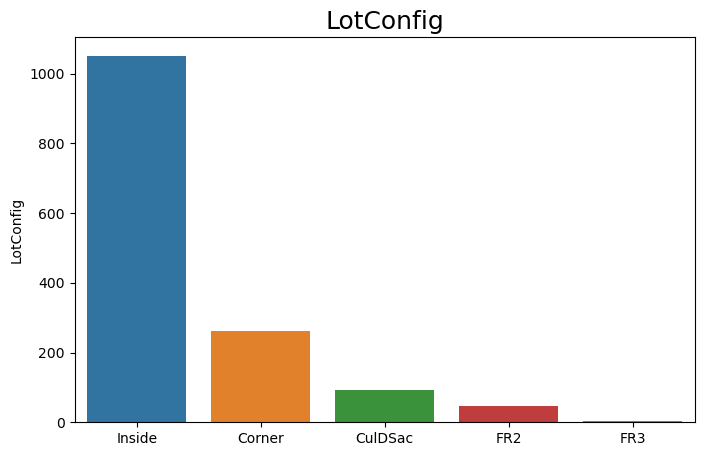

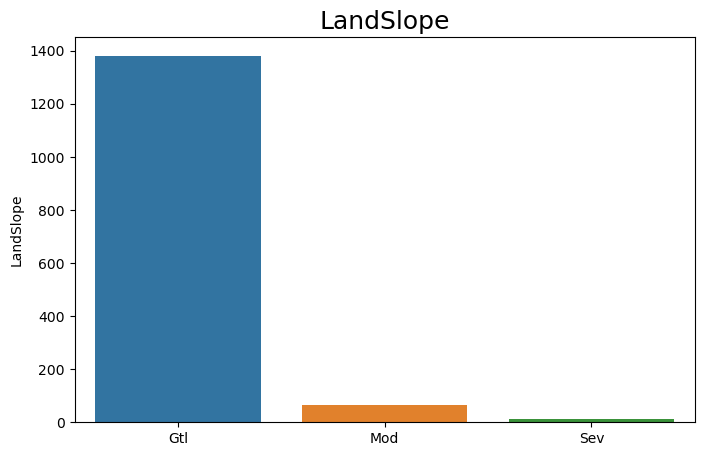

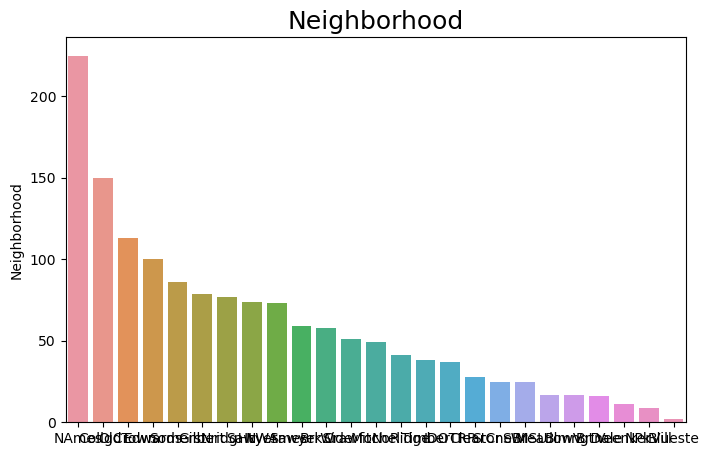

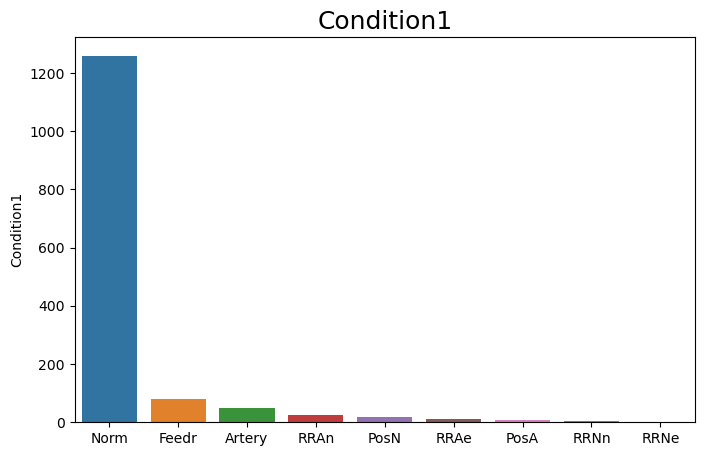

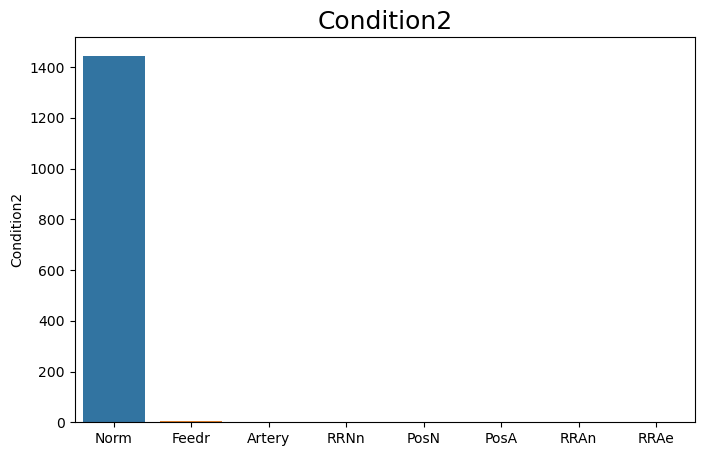

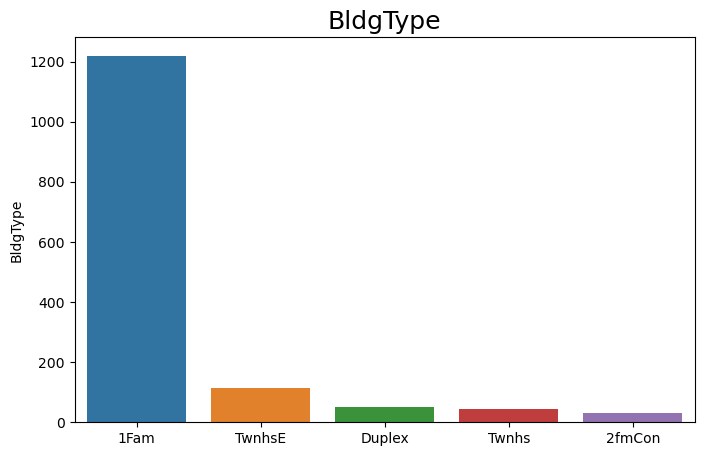

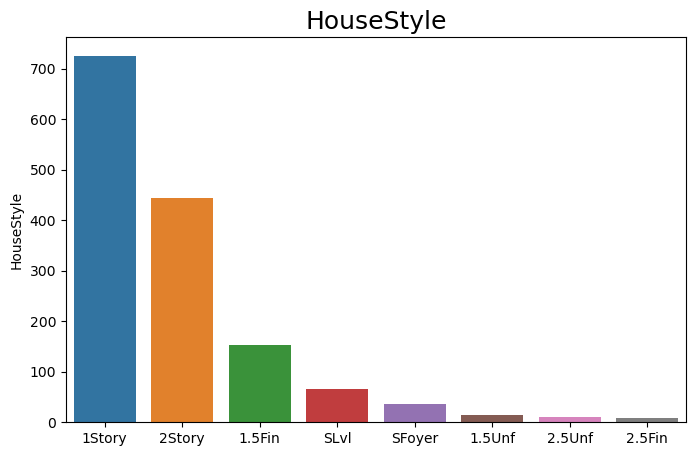

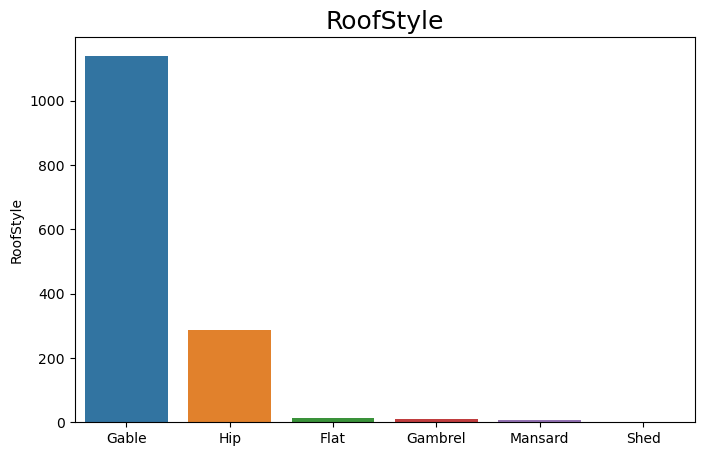

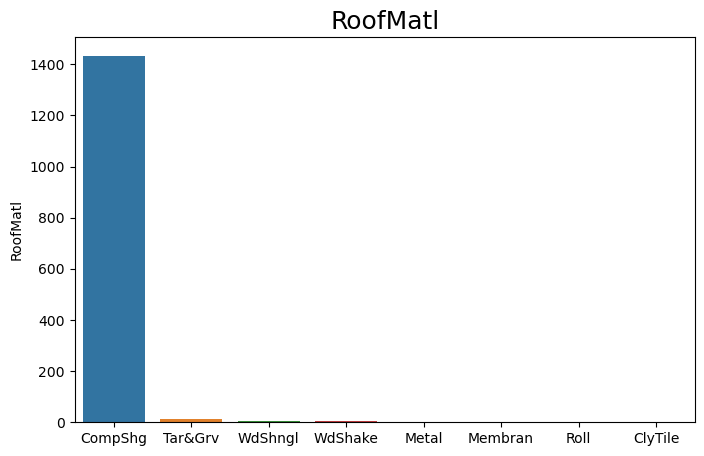

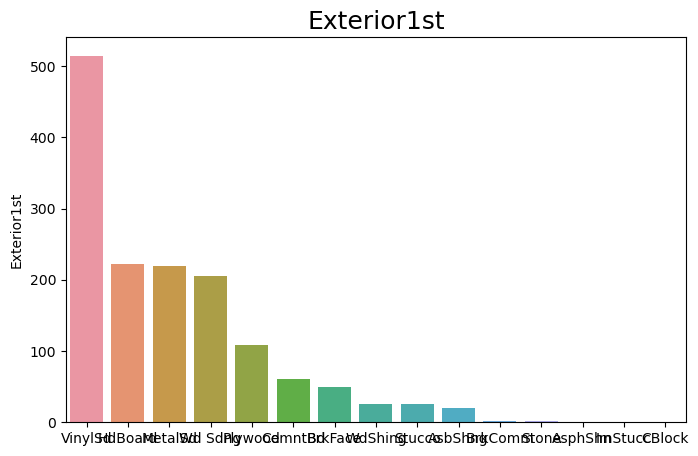

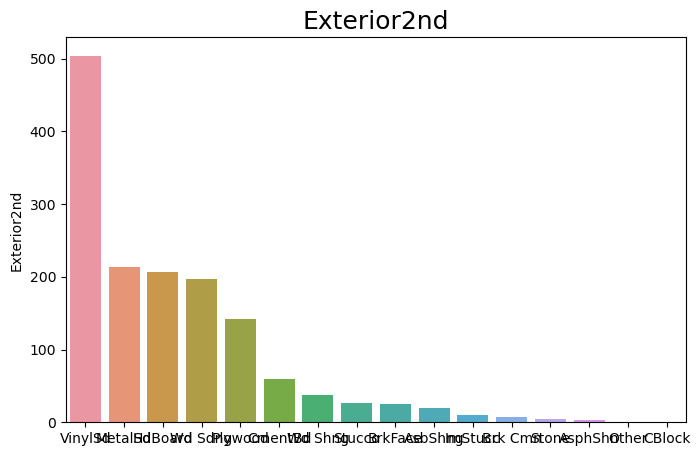

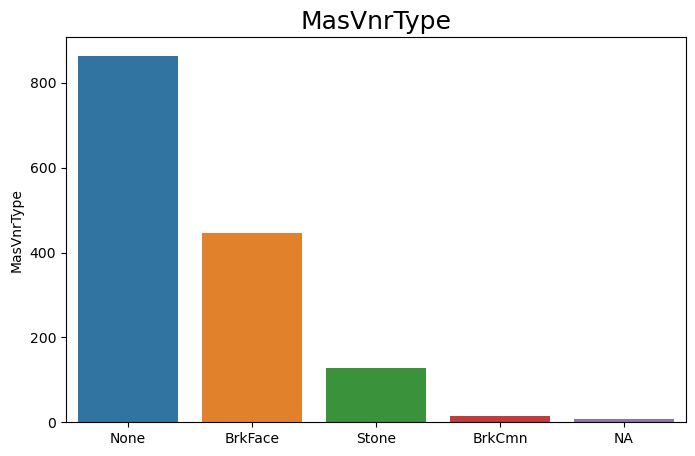

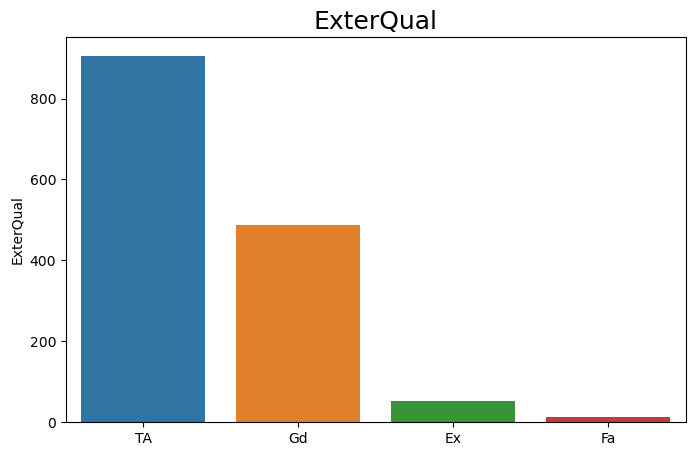

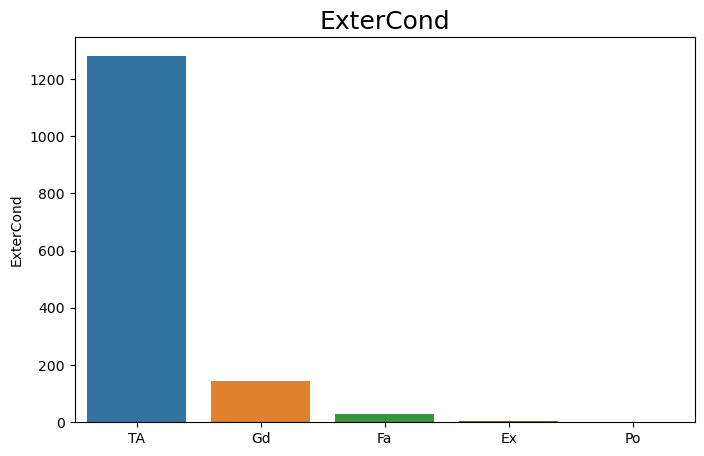

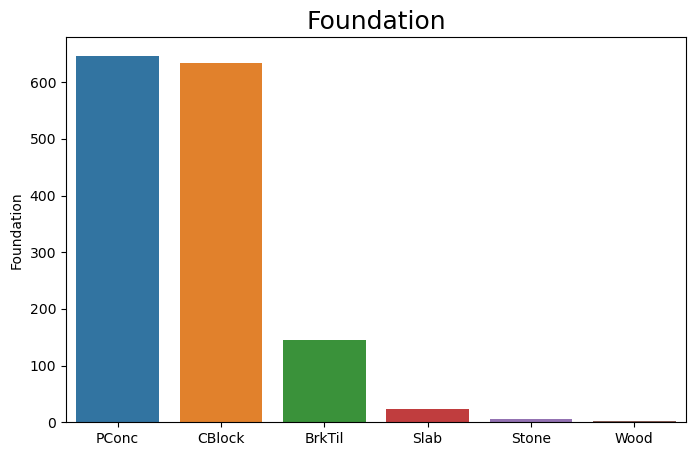

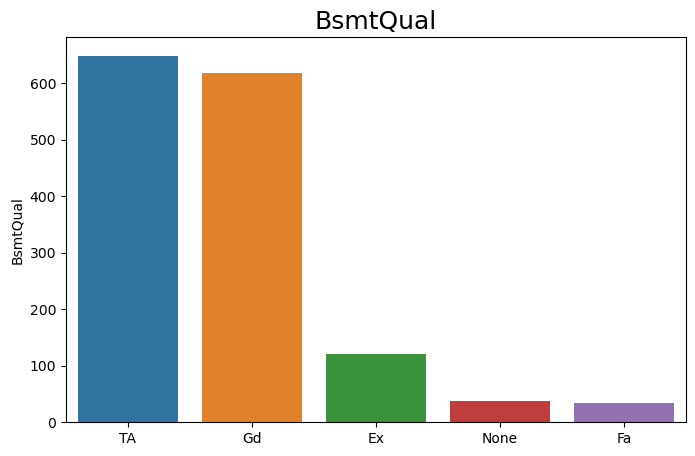

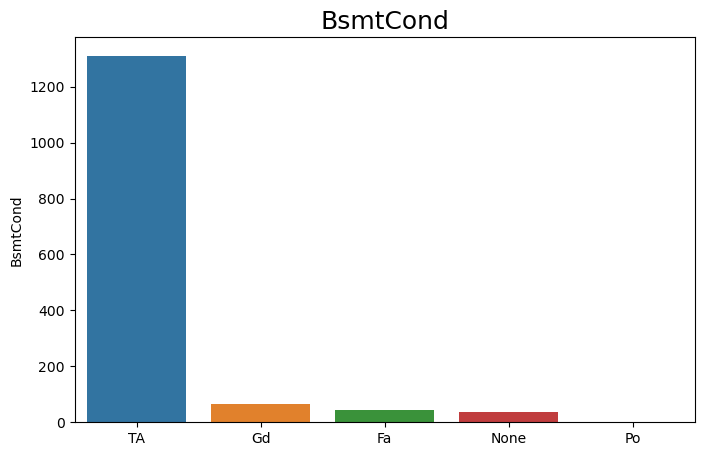

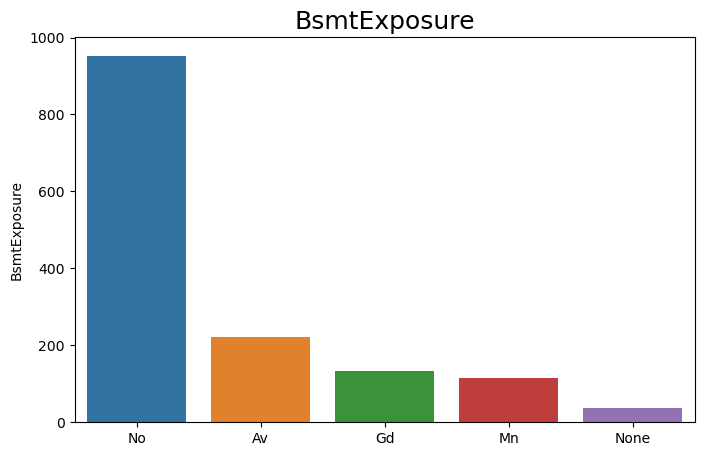

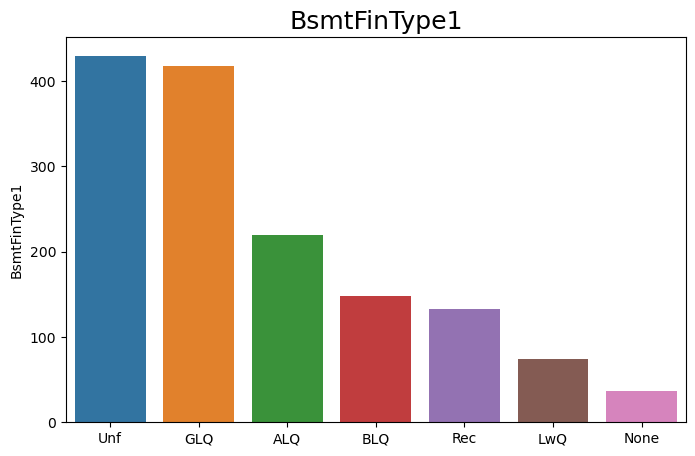

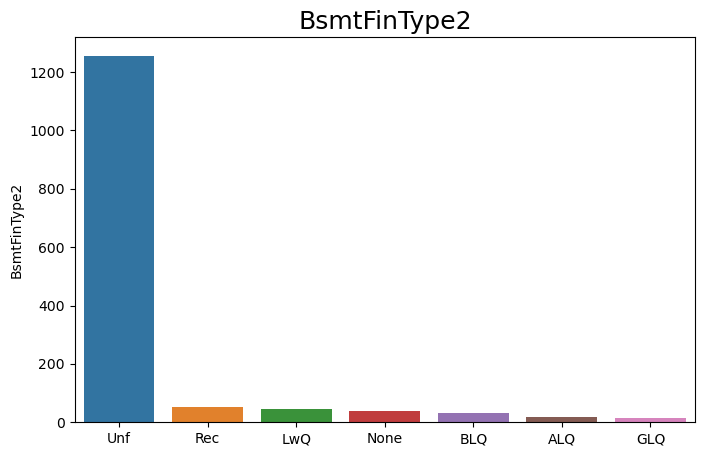

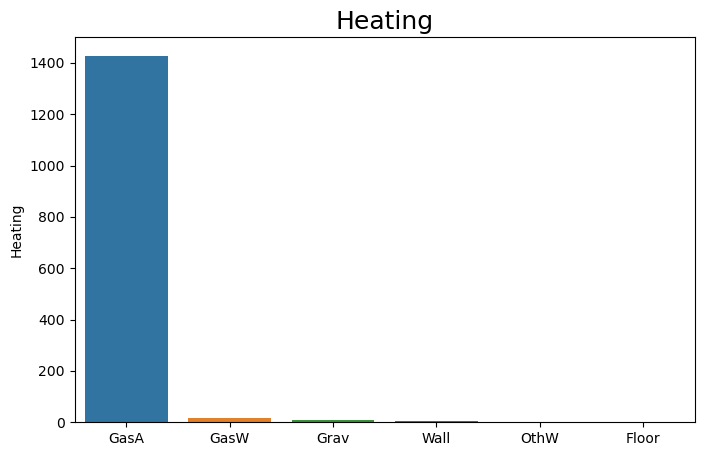

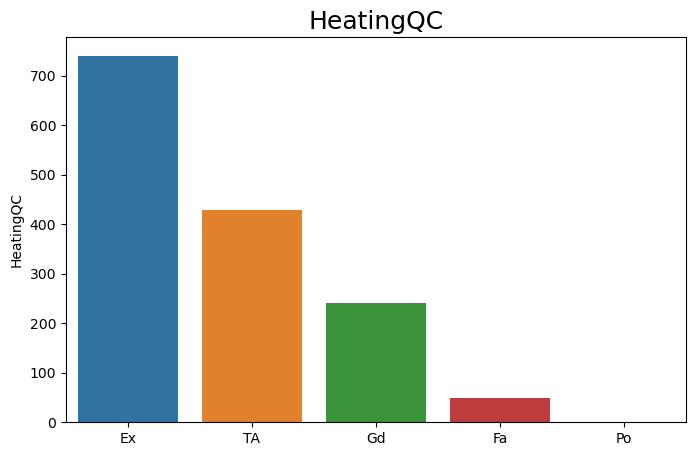

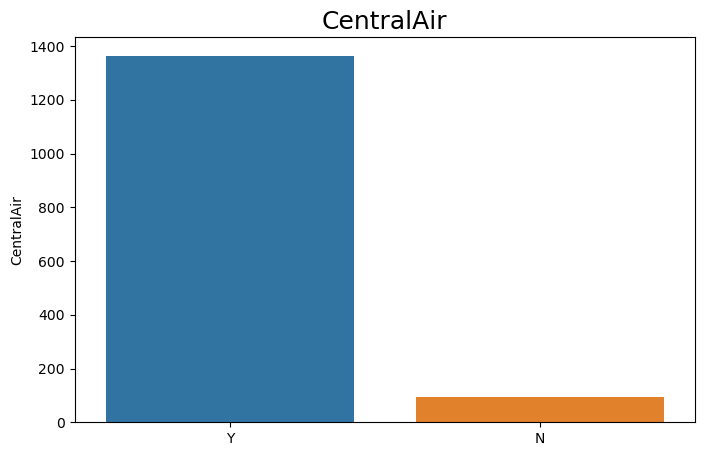

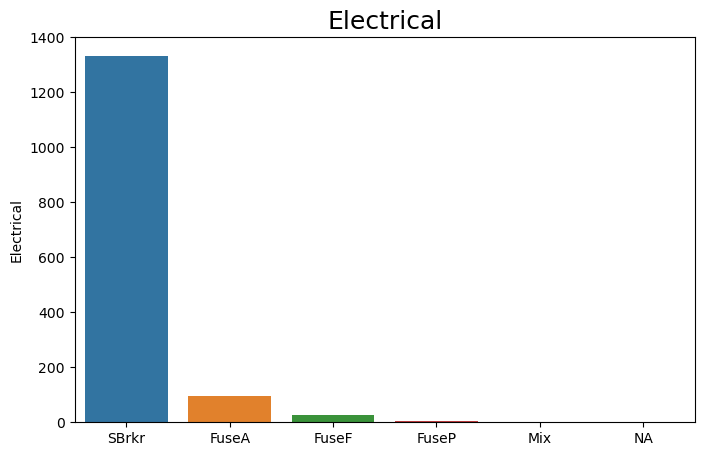

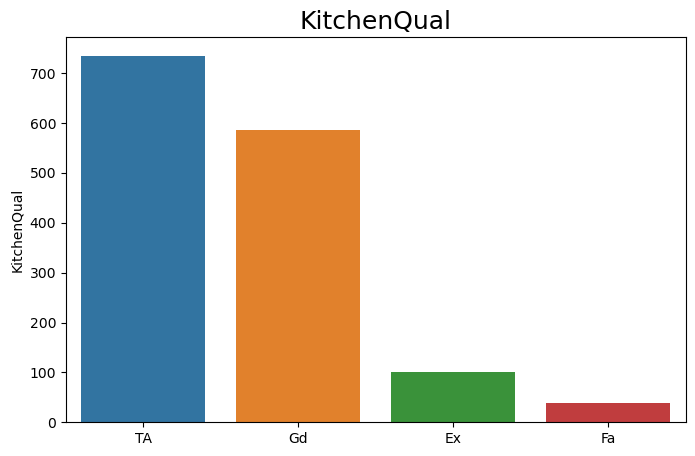

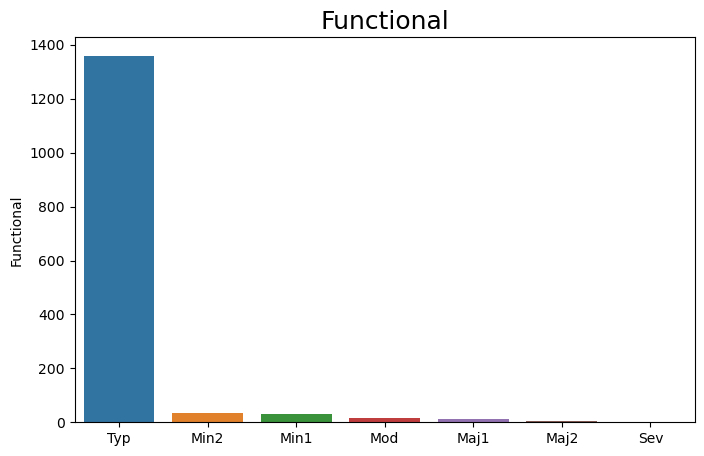

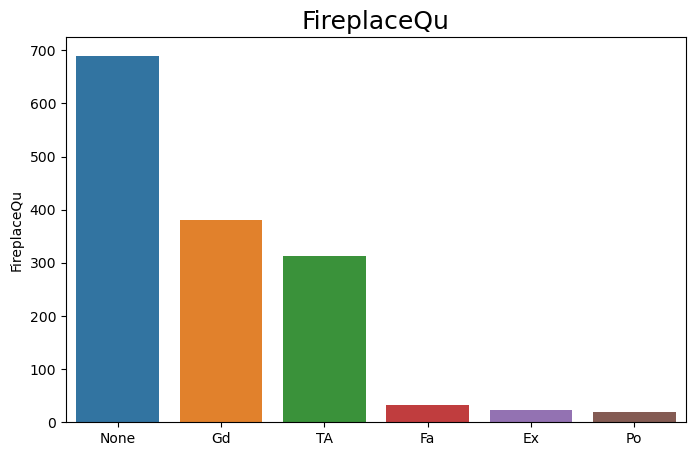

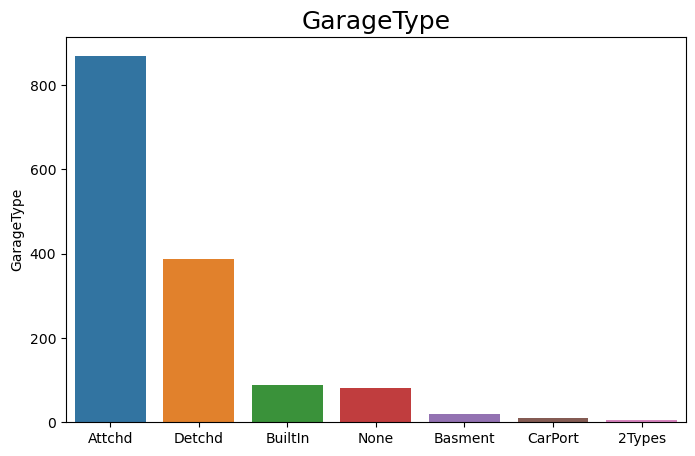

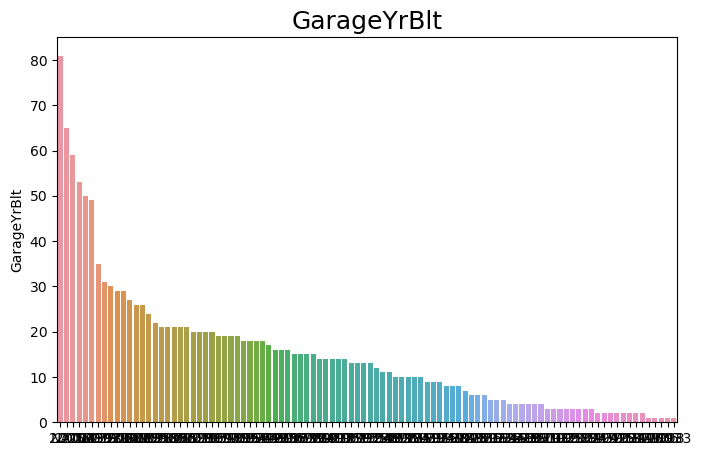

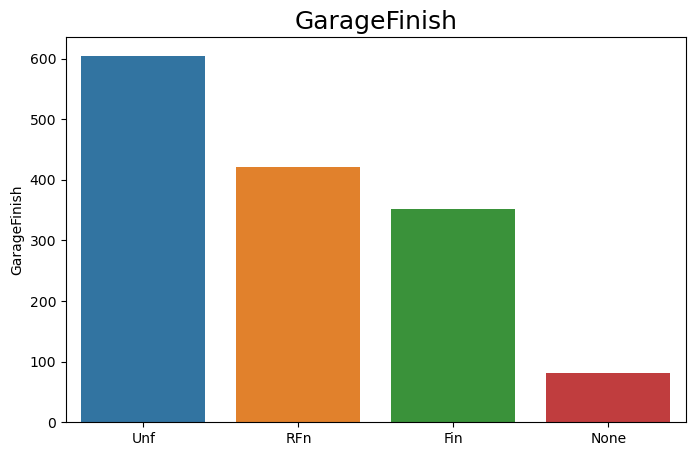

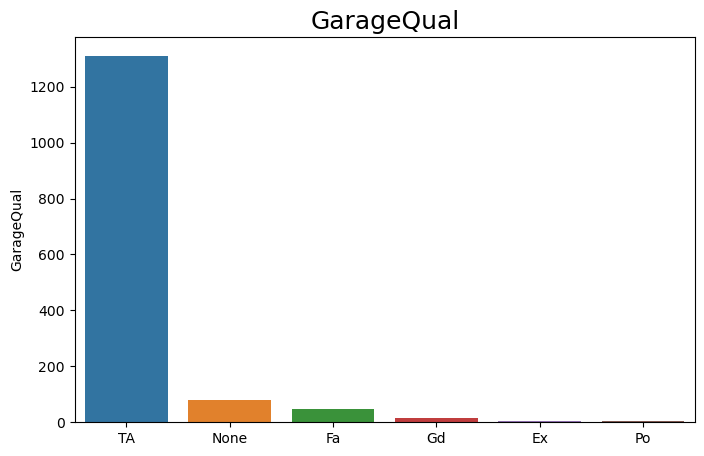

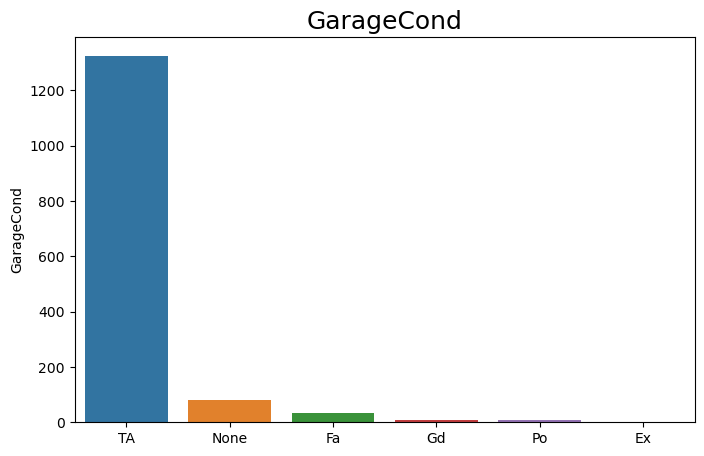

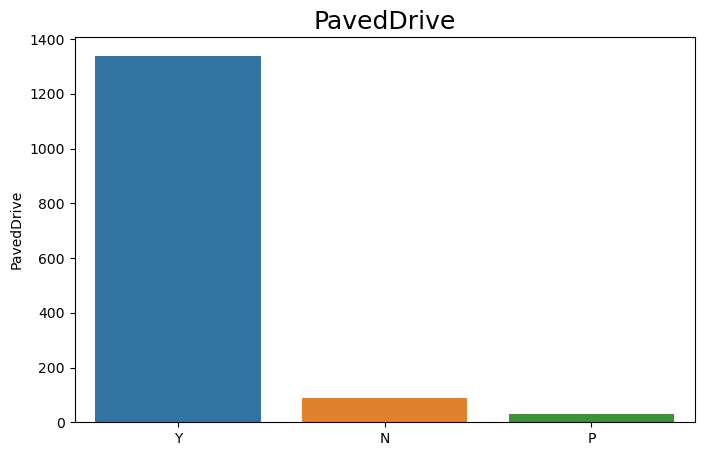

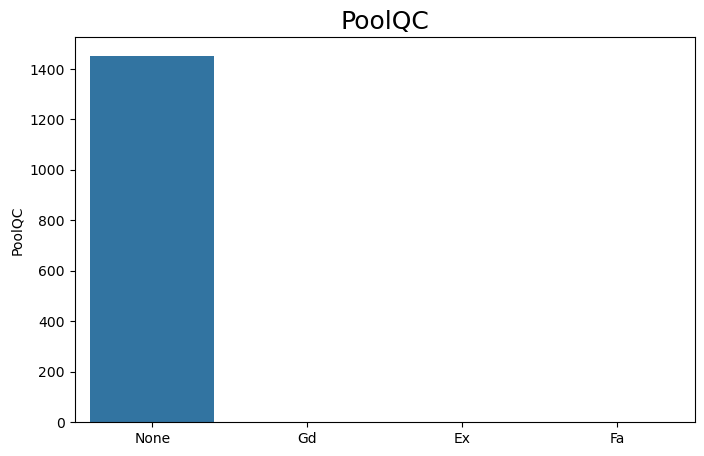

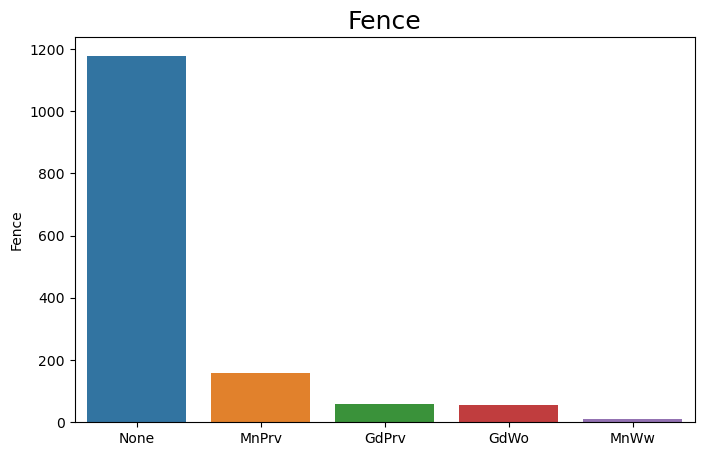

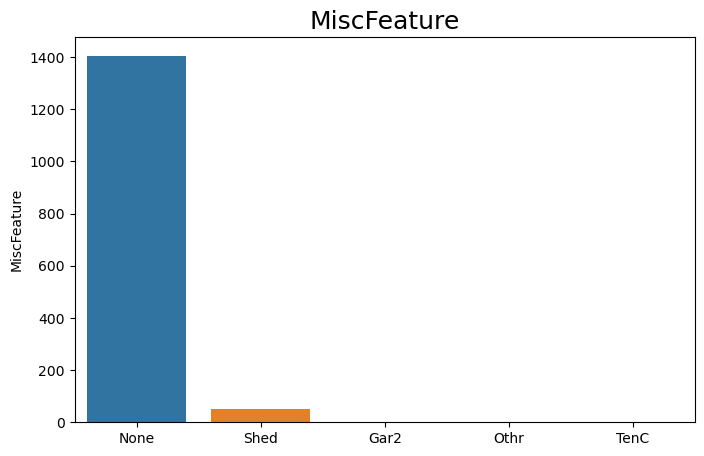

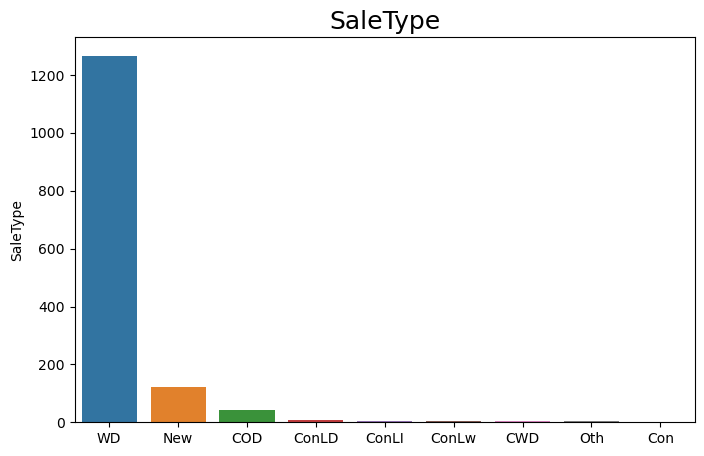

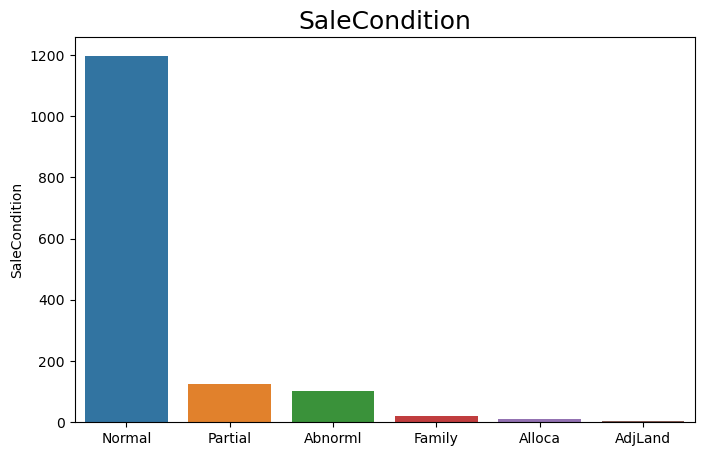

In [24]:
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.show()

Checking Correlation between numerical variables 

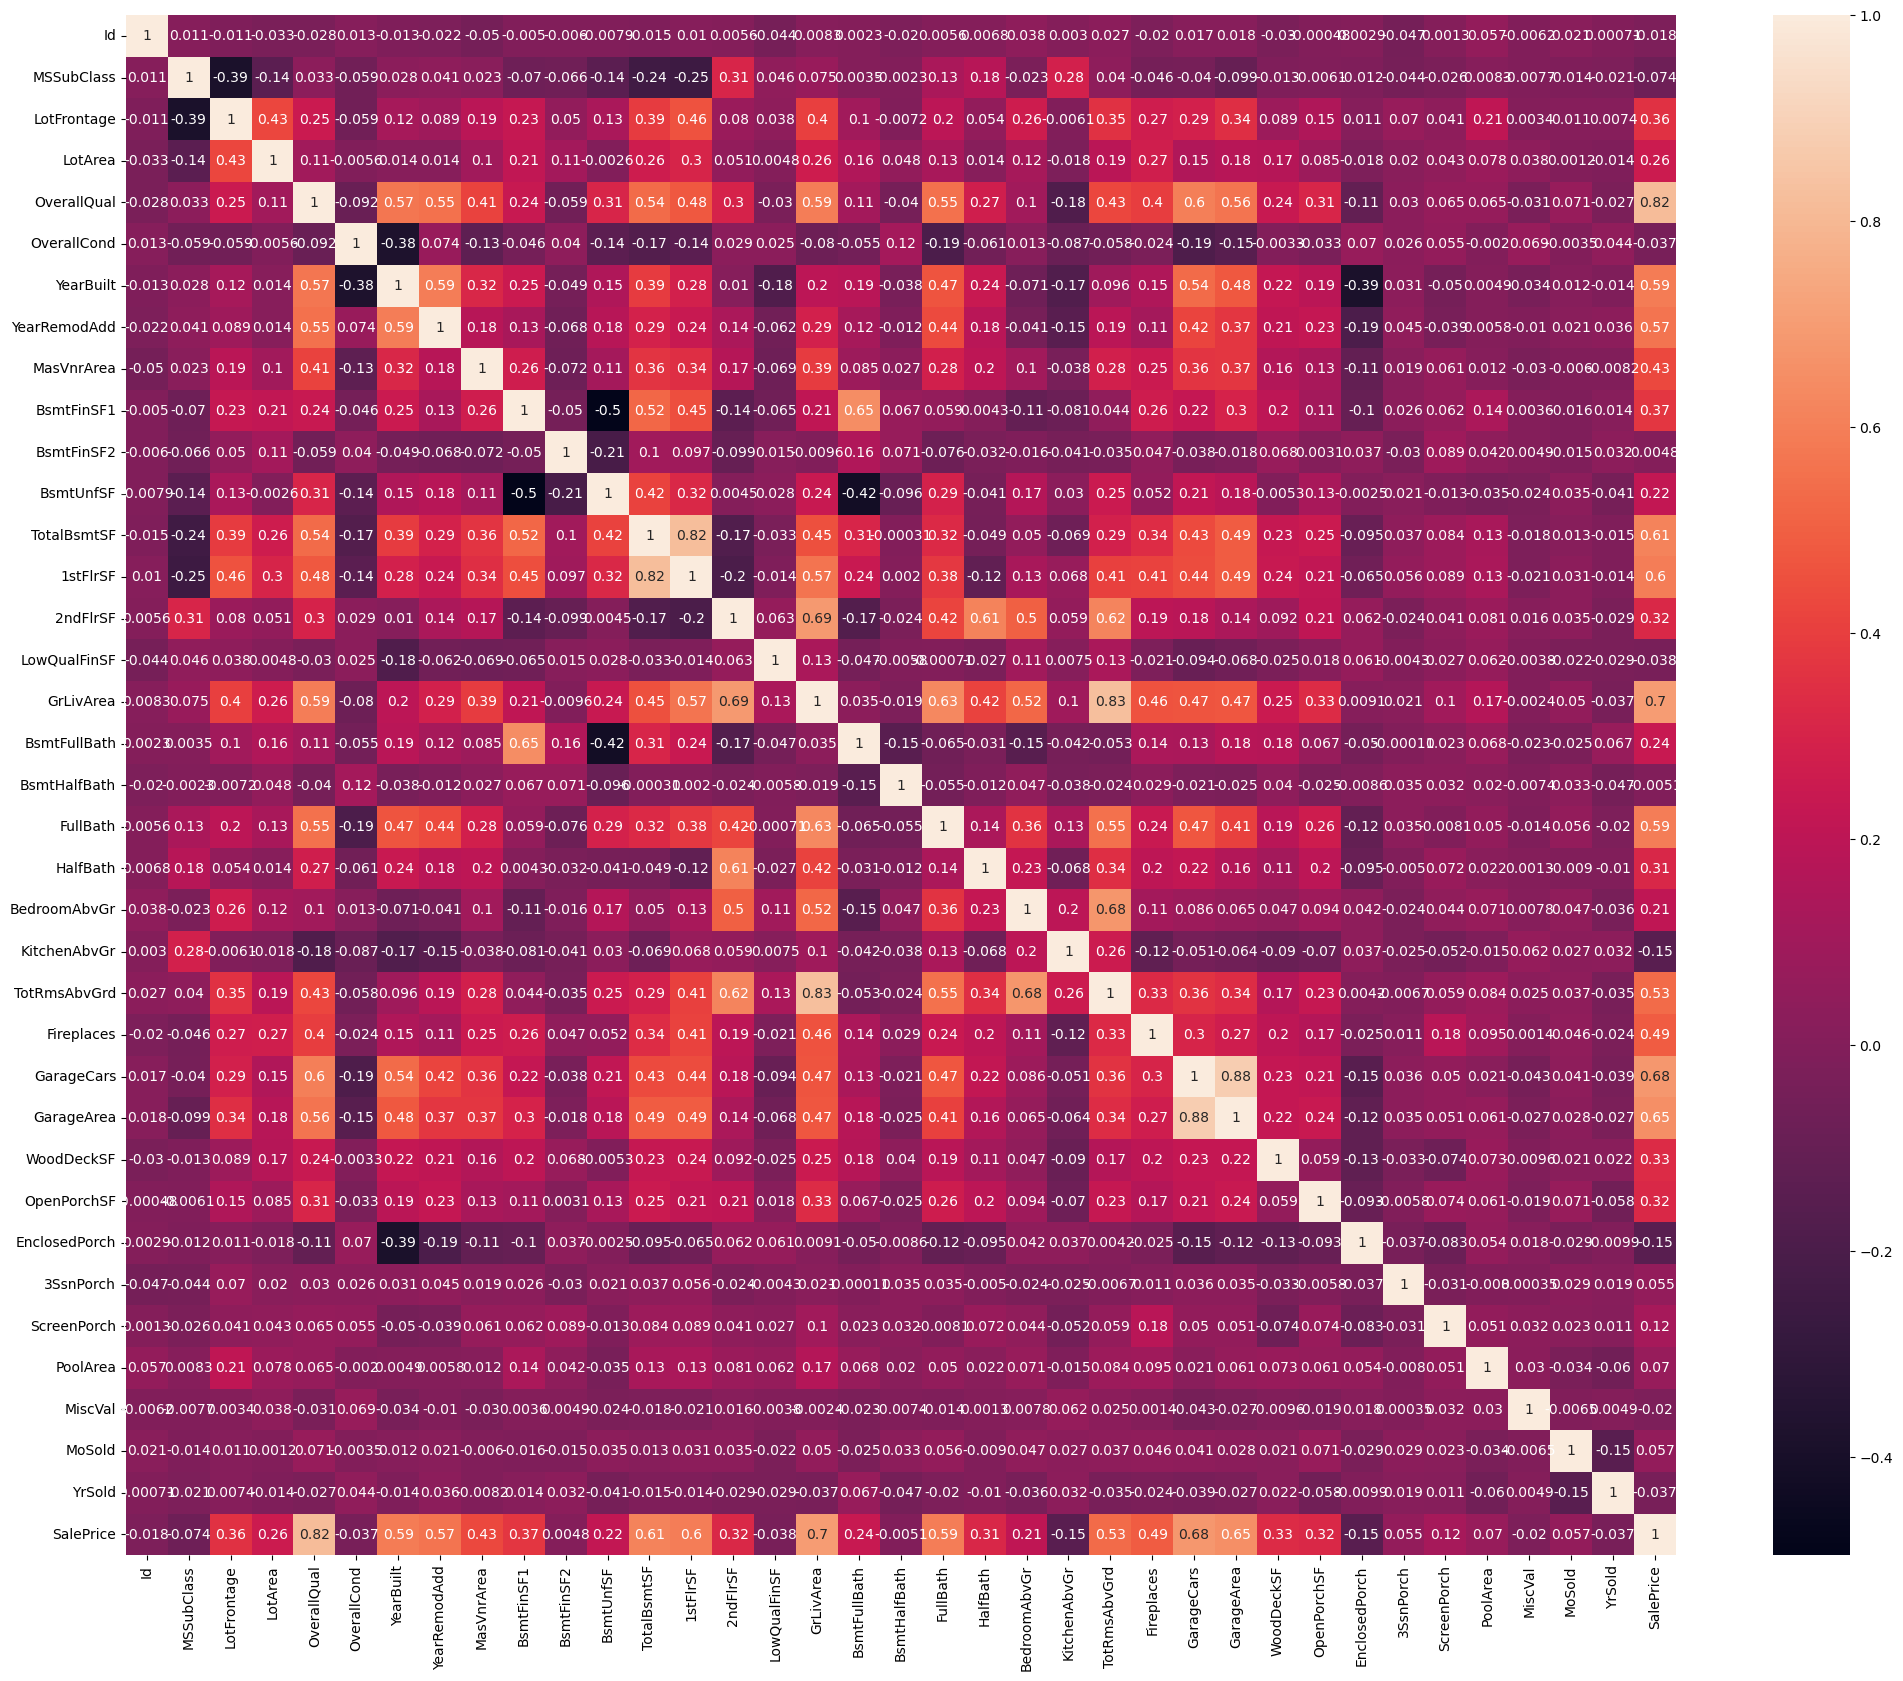

In [25]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True);

In [26]:
#we see that SalePrice is highly correlated with OverallQual, GrLivArea, GarageCars and GarageArea.

In [27]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
## View the dataframe again
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,WD,Normal,12.429216,8


In [28]:
## View the missing values in all features
missing_values  = df.isna().sum()


In [29]:
# Find columns with missing values (sum greater than 0)
columns_with_missing_values = missing_values[missing_values > 0]

# Print the columns with missing values and their respective counts
print(columns_with_missing_values)

LotFrontage    259
MasVnrArea       8
dtype: int64


In [30]:
## Two columns LotFrontage and MasVnrArea have missing values
## Replacing missing values in the above meniioned two columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

Seperating Categorical and numerical features


In [31]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [32]:
##encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
df_cat_encoded.shape

(1460, 322)

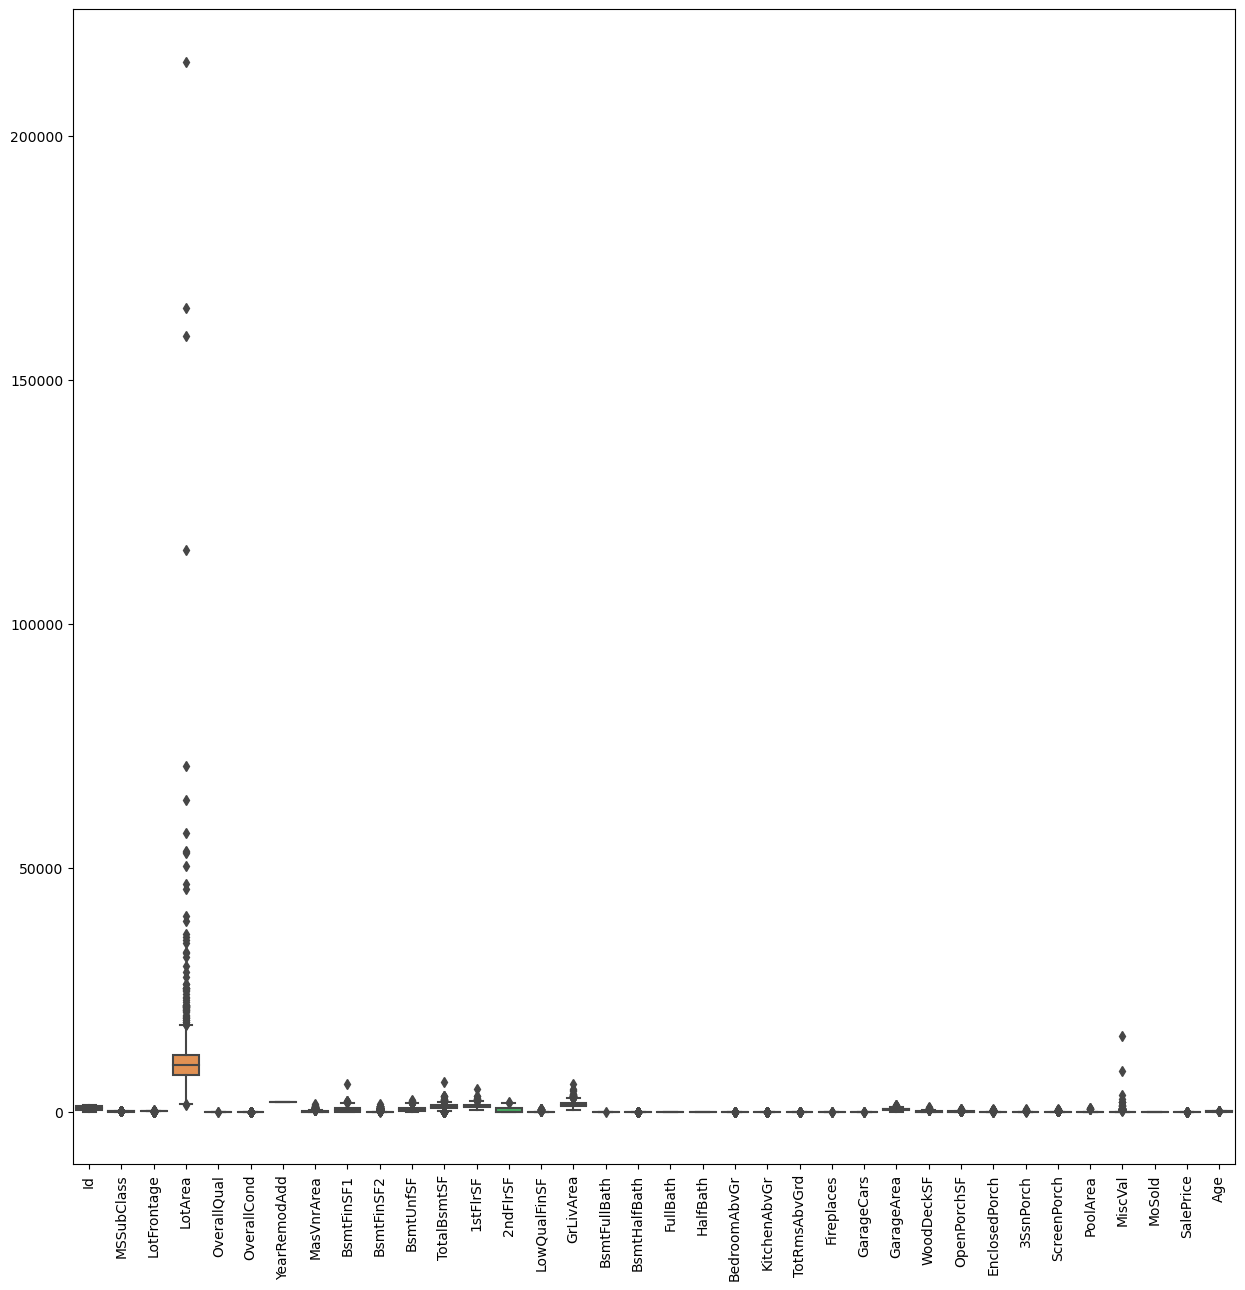

In [34]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [35]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

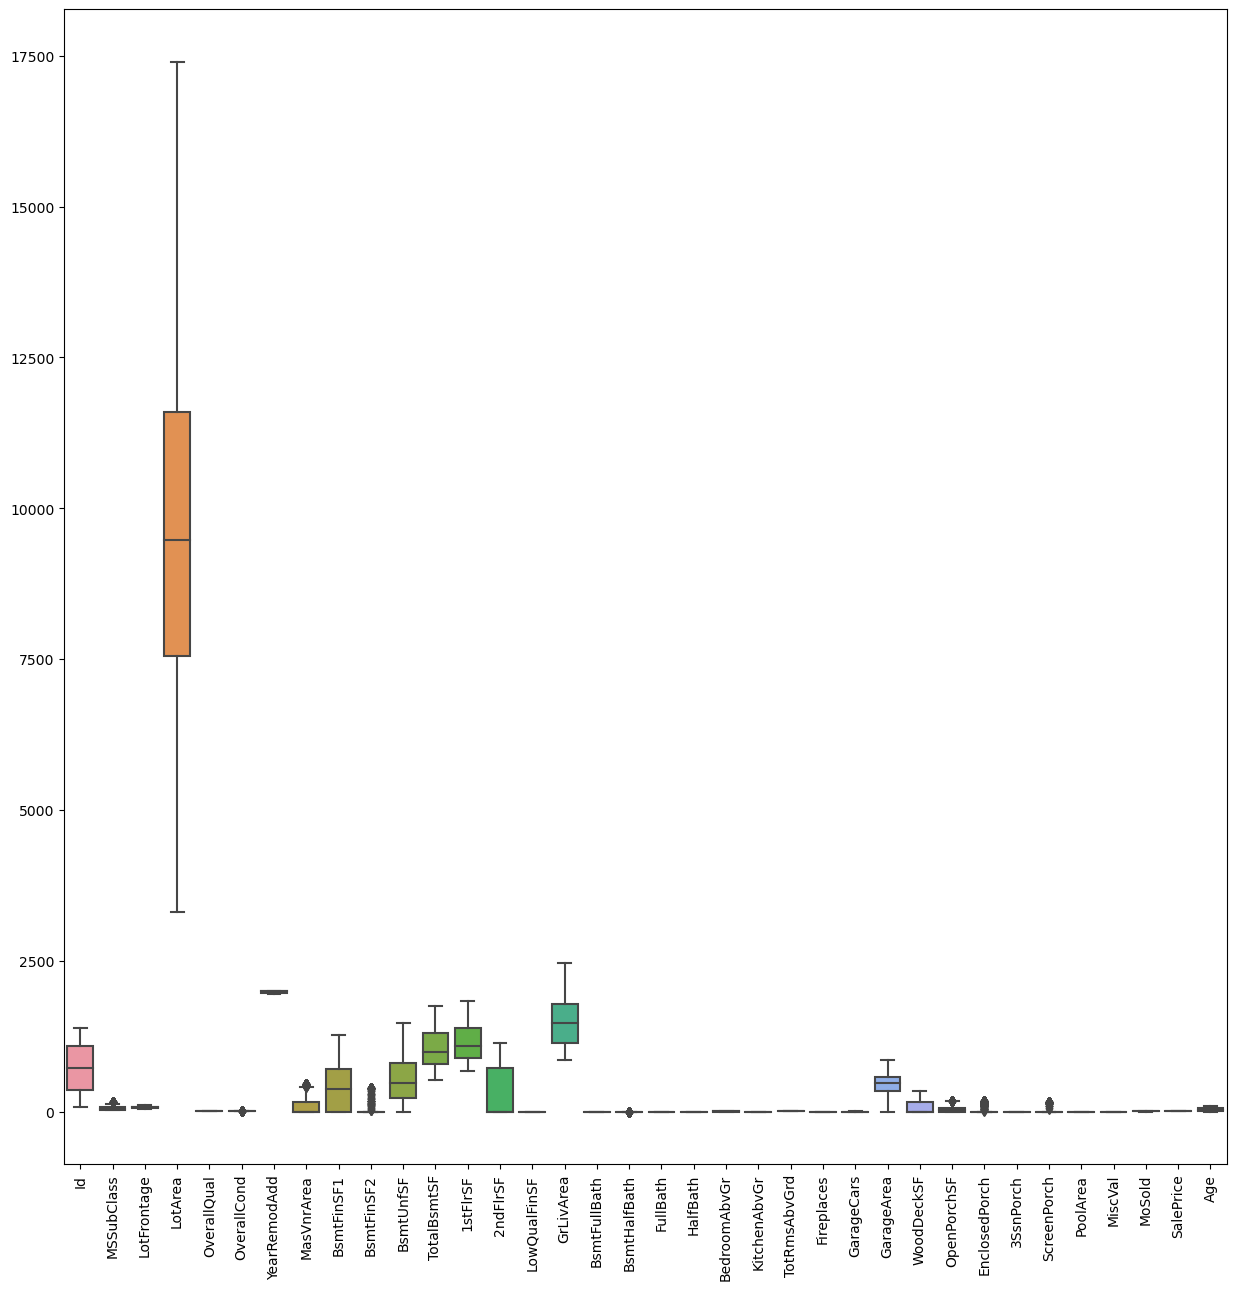

In [36]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

### outliers have been removed from numerical columns in the dataset

In [37]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,73.95,60,65.0,8450.0,7,5,2003,196.0,706,0.0,...,0,0,0,0,1,0,0,0,1,0
1,73.95,20,80.0,9600.0,6,8,1976,0.0,978,0.0,...,0,0,0,0,1,0,0,0,1,0
2,73.95,60,68.0,11250.0,7,5,2002,162.0,486,0.0,...,0,0,0,0,1,0,0,0,1,0
3,73.95,70,60.0,9550.0,7,5,1970,0.0,216,0.0,...,0,0,0,0,1,0,0,0,0,0
4,73.95,60,84.0,14260.0,8,5,2000,350.0,655,0.0,...,0,0,0,0,1,0,0,0,1,0


## Model Creation


In [38]:
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,2003,196.0,706,0.0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,6,8,1976,0.0,978,0.0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,7,5,2002,162.0,486,0.0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,7,5,1970,0.0,216,0.0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,8,5,2000,350.0,655,0.0,490,...,0,0,0,0,1,0,0,0,1,0


In [39]:
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Splitting data to Train and test

In [40]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [41]:
print(X_train.shape)
print(y_train.shape)

(1168, 356)
(1168,)


In [42]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [43]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Creating a resuable function that will print out the R-squared, RSS , MSE and RMSE values for both Train and Test data sets. this is to reduce code duplication

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_regression(y_train_true, y_train_pred, y_test_true, y_test_pred):
    # R-squared (Train and Test)
    r2_train = r2_score(y_train_true, y_train_pred)
    r2_test = r2_score(y_test_true, y_test_pred)
    
    # RSS (Residual Sum of Squares) (Train and Test)
    rss_train = np.sum(np.square(y_train_true - y_train_pred))
    rss_test = np.sum(np.square(y_test_true - y_test_pred))
    
    # MSE (Mean Squared Error) (Train and Test)
    mse_train = mean_squared_error(y_train_true, y_train_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    
    # RMSE (Root Mean Squared Error) (Train and Test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    # Print the results
    print("R-Squared (Train):", r2_train)
    print("R-Squared (Test):", r2_test)
    print("RSS (Train):", rss_train)
    print("RSS (Test):", rss_test)
    print("MSE (Train):", mse_train)
    print("MSE (Test):", mse_test)
    print("RMSE (Train):", rmse_train)
    print("RMSE (Test):", rmse_test)


### Ridge Model

In [45]:
## running cross validation on a list of alphas to find the optimum value of alpha
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [46]:
ridge = Ridge()
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [48]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.03384256, 0.03612313, 0.03540034, 0.02791476, 0.03208232,
        0.02581706, 0.03286414, 0.02939916, 0.02979875, 0.04420018,
        0.02760053, 0.02760024, 0.02419996, 0.02879863, 0.02819939,
        0.02740068, 0.02660012, 0.0263988 , 0.02537761, 0.02580538,
        0.02800226, 0.02519846, 0.0270009 , 0.02639961, 0.02580199,
        0.02619858, 0.02579885, 0.02459946]),
 'std_fit_time': array([0.00590967, 0.00534971, 0.00280097, 0.00656658, 0.00957436,
        0.00074179, 0.01397113, 0.00307207, 0.00370765, 0.03153016,
        0.00233248, 0.00407902, 0.00098064, 0.00318497, 0.00116517,
        0.00287003, 0.00233383, 0.00135542, 0.00105729, 0.00146612,
        0.00219019, 0.00097933, 0.00141469, 0.00149806, 0.00116497,
        0.00074885, 0.00172084, 0.0004901 ]),
 'mean_score_time': array([0.00730209, 0.0069036 , 0.00680032, 0.00699902, 0.00772653,
        0.00863357, 0.00890508, 0.00859838, 0.01519952, 0.00659938,
        0.00840144, 0.00780058, 0.008802

### hence best alpha value is 10. 

In [49]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [50]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [51]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([-1.83451913e-02,  5.03042730e-03,  2.14452533e-02,  5.59361256e-02,
        3.94066039e-02,  2.09184073e-02, -4.45208801e-03,  1.81615694e-03,
       -6.21087389e-03, -2.27106644e-02,  5.82682132e-02,  7.96478031e-03,
        2.75066532e-02,  0.00000000e+00,  8.87666856e-02,  1.05294995e-02,
        2.65725964e-04,  9.14417280e-03,  1.10456526e-02,  6.54971945e-03,
        0.00000000e+00,  4.85246419e-04,  1.81025149e-02,  1.76825169e-02,
        1.49177412e-02,  1.24987550e-02,  6.67730067e-03,  2.76508340e-03,
        0.00000000e+00,  1.05814034e-02,  0.00000000e+00,  0.00000000e+00,
       -3.56074780e-04, -4.73384009e-02,  2.96535541e-02,  1.58074754e-02,
        1.35053193e-02, -2.42255758e-02, -6.44806972e-03, -4.19512934e-03,
        1.40973201e-02,  8.72659875e-03, -2.76997373e-02, -9.21355025e-04,
        3.66252194e-02,  1.65597614e-02,  1.76489088e-02, -1.41898791e-02,
        2.37328310e-02, -1.73470083e-02, -3.72467975e-03, -2.74577597e-04,
        5.42778554e-03,  

In [52]:
## predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
ridge_metrics = evaluate_regression(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.9374655980161007
R-Squared (Test): 0.9259396028422432
RSS (Train): 8.90209121629583
RSS (Test): 2.8888652997983466
MSE (Train): 0.007621653438609443
MSE (Test): 0.009893374314377899
RMSE (Train): 0.087302081525067
RMSE (Test): 0.09946544281496915


plotting r2 score against different alpha values for train and test data sets

In [53]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033843,0.005910,0.007302,0.001252,0.0001,{'alpha': 0.0001},-0.083551,-0.097026,-0.095553,-0.095467,...,-0.092164,0.005077,27,-0.052219,-0.049346,-0.051681,-0.050336,-0.052605,-0.051237,0.001218
1,0.036123,0.005350,0.006904,0.000495,0.001,{'alpha': 0.001},-0.083569,-0.095968,-0.094784,-0.095256,...,-0.091668,0.004798,26,-0.052280,-0.049425,-0.051735,-0.050348,-0.052625,-0.051283,0.001210
2,0.035400,0.002801,0.006800,0.000748,0.01,{'alpha': 0.01},-0.083232,-0.092250,-0.093138,-0.093597,...,-0.089897,0.004027,25,-0.052688,-0.049876,-0.051886,-0.050529,-0.052777,-0.051551,0.001163
3,0.027915,0.006567,0.006999,0.000633,0.05,{'alpha': 0.05},-0.081728,-0.089224,-0.091327,-0.090026,...,-0.087695,0.003432,24,-0.053532,-0.050711,-0.052128,-0.051213,-0.053120,-0.052141,0.001077
4,0.032082,0.009574,0.007727,0.000861,0.1,{'alpha': 0.1},-0.080279,-0.087871,-0.089877,-0.088049,...,-0.086224,0.003350,23,-0.054002,-0.051228,-0.052315,-0.051699,-0.053398,-0.052528,0.001035
5,0.025817,0.000742,0.008634,0.002143,0.2,{'alpha': 0.2},-0.078469,-0.086298,-0.087905,-0.086821,...,-0.084544,0.003412,21,-0.054510,-0.051810,-0.052629,-0.052289,-0.053802,-0.053008,0.000998
6,0.032864,0.013971,0.008905,0.002538,0.3,{'alpha': 0.3},-0.077387,-0.085259,-0.086548,-0.086136,...,-0.083431,0.003449,20,-0.054836,-0.052198,-0.052891,-0.052660,-0.054145,-0.053346,0.000985
7,0.029399,0.003072,0.008598,0.001200,0.4,{'alpha': 0.4},-0.076491,-0.084466,-0.085539,-0.085651,...,-0.082575,0.003529,19,-0.055101,-0.052491,-0.053107,-0.052945,-0.054439,-0.053617,0.000985
8,0.029799,0.003708,0.015200,0.014415,0.5,{'alpha': 0.5},-0.075779,-0.083836,-0.084800,-0.085285,...,-0.081903,0.003617,18,-0.055342,-0.052761,-0.053304,-0.053197,-0.054691,-0.053859,0.000984
9,0.044200,0.031530,0.006599,0.000492,0.6,{'alpha': 0.6},-0.075175,-0.083344,-0.084194,-0.084976,...,-0.081356,0.003700,17,-0.055555,-0.052992,-0.053496,-0.053425,-0.054911,-0.054076,0.000982


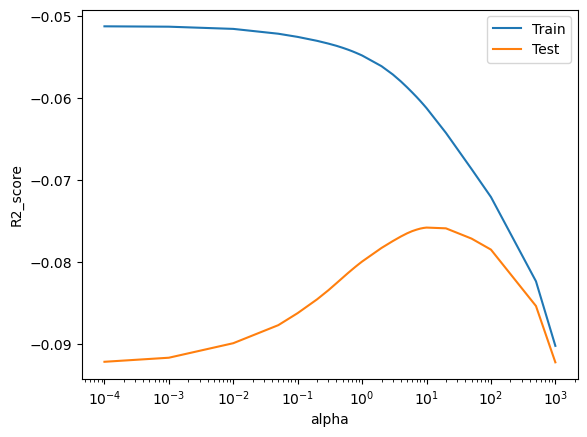

In [54]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

as alpha increases there is decrease in train error 

## Lasso Model

In [55]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [57]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.14441414, 0.04580579, 0.02459784, 0.02320395, 0.02239509,
        0.02719679, 0.02460051, 0.0291954 , 0.02160282, 0.02519841,
        0.02340088, 0.02579966, 0.02480173, 0.023598  , 0.02460098,
        0.0226017 , 0.02200069, 0.02640252, 0.03360896, 0.0307066 ,
        0.02300081, 0.02851844, 0.02530308, 0.0252018 , 0.02359958,
        0.02280312, 0.02280068, 0.01939836]),
 'std_fit_time': array([0.0226494 , 0.01293361, 0.00080634, 0.00172277, 0.00102047,
        0.00938577, 0.00899987, 0.00899627, 0.00408095, 0.00730415,
        0.00781444, 0.00416676, 0.00421528, 0.00500297, 0.00615089,
        0.00149611, 0.00414861, 0.00977072, 0.00928514, 0.0110218 ,
        0.00275559, 0.00810053, 0.00854133, 0.00360069, 0.00496593,
        0.00213477, 0.00318838, 0.00224483]),
 'mean_score_time': array([0.00839825, 0.00739932, 0.007798  , 0.00759702, 0.00859981,
        0.00920415, 0.00779972, 0.0079988 , 0.00879769, 0.01239905,
        0.00939808, 0.01459985, 0.008399

#### Optimum value for alpha for Lasso Model is 0.001

In [58]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01230886,  0.00157881,  0.02198867,  0.06906633,  0.04190611,
        0.01924443, -0.00145999,  0.02123919, -0.        , -0.00530648,
        0.04540691, -0.        ,  0.00724821,  0.        ,  0.10530845,
        0.011682  ,  0.        ,  0.0039567 ,  0.00860199,  0.        ,
        0.        , -0.        ,  0.02102553,  0.02017621,  0.01628917,
        0.01178418,  0.00602985,  0.00156509,  0.        ,  0.00986309,
        0.        ,  0.        , -0.        , -0.05261722,  0.        ,
        0.        ,  0.        , -0.03892185, -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.00355504,  0.00751176,
        0.        , -0.        , -0.        ,  0.01453287, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.02571263,  0.00444702, -0.        ,  0.076971  ,
       -0.02802972, -0.        ,  0.        , -0.        , -0.        ,
       -0.0012238 ,  0.        , -0.00095469, -0.        ,  0.03

In [59]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [60]:
lasso_metrics = evaluate_regression(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.9191199609643507
R-Squared (Test): 0.9252165504005585
RSS (Train): 11.513686262775758
RSS (Test): 2.9170693223107818
MSE (Train): 0.009857608101691574
MSE (Test): 0.00998996343257117
RMSE (Train): 0.09928548787054216
RMSE (Test): 0.09994980456494736


In [61]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.144414,0.022649,0.008398,0.001021,0.0001,{'alpha': 0.0001},-0.070529,-0.080784,-0.081237,-0.083995,...,-0.078608,0.004699,2,-0.057997,-0.055327,-0.055786,-0.055600,-0.056695,-0.056281,0.000973
1,0.045806,0.012934,0.007399,0.000484,0.001,{'alpha': 0.001},-0.070740,-0.081484,-0.078388,-0.079709,...,-0.076211,0.004577,1,-0.071894,-0.068620,-0.069616,-0.069966,-0.070994,-0.070218,0.001130
2,0.024598,0.000806,0.007798,0.000748,0.01,{'alpha': 0.01},-0.080286,-0.097208,-0.089635,-0.090042,...,-0.086330,0.008000,3,-0.085870,-0.081542,-0.083588,-0.083921,-0.086887,-0.084362,0.001865
3,0.023204,0.001723,0.007597,0.000494,0.05,{'alpha': 0.05},-0.101800,-0.122618,-0.123647,-0.119563,...,-0.113625,0.010283,4,-0.113687,-0.110241,-0.111403,-0.112352,-0.113895,-0.112316,0.001379
4,0.022395,0.001020,0.008600,0.002798,0.1,{'alpha': 0.1},-0.142841,-0.157345,-0.174191,-0.157948,...,-0.154989,0.011693,5,-0.158003,-0.152011,-0.153896,-0.152860,-0.155057,-0.154366,0.002085
5,0.027197,0.009386,0.009204,0.003971,0.2,{'alpha': 0.2},-0.222206,-0.231832,-0.258085,-0.237482,...,-0.233481,0.014122,6,-0.235339,-0.232270,-0.232058,-0.230941,-0.234194,-0.232960,0.001584
6,0.024601,0.009000,0.007800,0.001169,0.3,{'alpha': 0.3},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
7,0.029195,0.008996,0.007999,0.000635,0.4,{'alpha': 0.4},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
8,0.021603,0.004081,0.008798,0.001472,0.5,{'alpha': 0.5},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
9,0.025198,0.007304,0.012399,0.005886,0.6,{'alpha': 0.6},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211


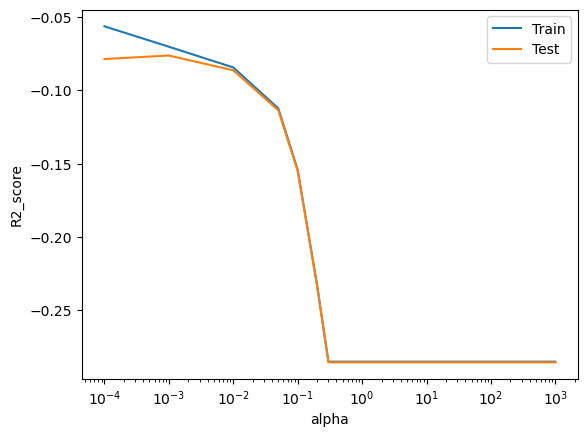

In [62]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### as alpha increases error in both test and train decreases

For RIdge Regression : 

* R-Squared (Train): 0.9374655980161007
* R-Squared (Test): 0.9259396028422432
* RSS (Train): 8.90209121629583
* RSS (Test): 2.8888652997983466
* MSE (Train): 0.007621653438609443
* MSE (Test): 0.009893374314377899
* RMSE (Train): 0.087302081525067
* RMSE (Test): 0.09946544281496915

For Lasso Regression :

* R-Squared (Train): 0.9191199609643507
* R-Squared (Test): 0.9252165504005585
* RSS (Train): 11.513686262775758
* RSS (Test): 2.9170693223107818
* MSE (Train): 0.009857608101691574
* MSE (Test): 0.00998996343257117
* RMSE (Train): 0.09928548787054216
* RMSE (Test): 0.09994980456494736



In [63]:
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [64]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas 

,Ridge,Lasso
MSSubClass,-0.018345,-0.012309
LotFrontage,0.005030,0.001579
LotArea,0.021445,0.021989
OverallQual,0.055936,0.069066
OverallCond,0.039407,0.041906
...,...,...
SaleCondition_AdjLand,0.016701,0.000000
SaleCondition_Alloca,0.063554,0.000000
SaleCondition_Family,-0.011676,-0.000000
SaleCondition_Normal,0.033586,0.011851


In [65]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
BsmtFinSF2,-0.006211,-0.0
1stFlrSF,0.007965,-0.0
LowQualFinSF,0.000000,0.0
BsmtHalfBath,0.000266,0.0
BedroomAbvGr,0.006550,0.0
...,...,...
SaleType_Oth,0.019441,0.0
SaleType_WD,-0.004561,-0.0
SaleCondition_AdjLand,0.016701,0.0
SaleCondition_Alloca,0.063554,0.0


In [66]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass              -0.012309
LotFrontage              0.001579
LotArea                  0.021989
OverallQual              0.069066
OverallCond              0.041906
                           ...   
GarageType_Attchd        0.011615
GarageYrBlt_2009         0.003894
GarageFinish_Unf        -0.007507
SaleCondition_Normal     0.011851
SaleCondition_Partial    0.017198
Name: Lasso, Length: 67, dtype: float64

In [67]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.088767
Neighborhood_Crawfor    0.078301
Functional_Typ          0.069810
Exterior1st_BrkFace     0.064904
SaleCondition_Alloca    0.063554
TotalBsmtSF             0.058268
OverallQual             0.055936
Neighborhood_StoneBr    0.049505
CentralAir_Y            0.042837
BsmtCond_Gd             0.042084
Name: Ridge, dtype: float64

In [68]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.092826
Neighborhood_Crawfor    1.081449
Functional_Typ          1.072304
Exterior1st_BrkFace     1.067057
SaleCondition_Alloca    1.065617
TotalBsmtSF             1.059999
OverallQual             1.057530
Neighborhood_StoneBr    1.050751
CentralAir_Y            1.043768
BsmtCond_Gd             1.042982
Name: Ridge, dtype: float64

In [69]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.105308
Neighborhood_Crawfor    0.076971
Exterior1st_BrkFace     0.069833
OverallQual             0.069066
Functional_Typ          0.062814
TotalBsmtSF             0.045407
Neighborhood_Somerst    0.042960
Condition1_Norm         0.042774
OverallCond             0.041906
Neighborhood_NridgHt    0.035978
Name: Lasso, dtype: float64

In [70]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.111053
Neighborhood_Crawfor    1.080011
Exterior1st_BrkFace     1.072329
OverallQual             1.071507
Functional_Typ          1.064829
TotalBsmtSF             1.046454
Neighborhood_Somerst    1.043896
Condition1_Norm         1.043702
OverallCond             1.042797
Neighborhood_NridgHt    1.036633
Name: Lasso, dtype: float64

## Conclusion

GrLivArea,Neighborhood_Crawfor, Exterior1st_BrkFace, OverallQual, Functional_Typ, TotalBsmtSF,Neighborhood_Somerst , Condition1_Norm, OverallCond  and Neighborhood_NridgHt  are the variables significant in predicting the house price              

Optimal value of lambda for Ridge Regression = 10 and Optimal value of lambda for Lasso = 0.001

How well those variables describe the price of a house : 

* GrLivArea - an increase of 1 sq.feet of the house area will increase the price by 1.105 to 1.111 times
* Neighborhood_Crawfor - an increase in value will increase the price by 1.076 to 1.08 times
* Exterior1st_BrkFace - if the value is Brick face in value will increase price by 0.069 to 1.072
* OverallQual - if overall Quality of the house is high, 0.069 to 1.071 times
* Functional_Typ - increase in this value will increase house price by 0.062 to 1.064 times
* TotalBsmtSF - increaase will have increase in price by a factor of 0.045 to 1.04 times 

### Solving for Assignment part 2


##### Q1 : What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

From the solutions above we have

* **Optimal value of alpha for Ridge Regression  = 10**

* **Optimal value of alpha for Lambda Regression  = 0.001**


In [71]:
# doubling alpha for ridge and lasso
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [72]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
ridge_metrics = evaluate_regression(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.9325830683575935
R-Squared (Test): 0.9279040419278098
RSS (Train): 9.597144227236793
RSS (Test): 2.8122386528230034
MSE (Train): 0.008216733071264378
MSE (Test): 0.009630954290489737
RMSE (Train): 0.09064619722450787
RMSE (Test): 0.0981374255342463


In [73]:
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [74]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
lasso_metrics = evaluate_regression(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.9096328740986329
R-Squared (Test): 0.9181347807651861
RSS (Train): 12.864221487807349
RSS (Test): 3.1933070869721654
MSE (Train): 0.011013888260109031
MSE (Test): 0.01093598317456221
RMSE (Train): 0.10494707361384133
RMSE (Test): 0.10457525125268508


#### Changes :

| ***Metric***             | ***Ridge old*** | ***Ridge New*** | ***Lasso Old*** | ***Lasso New*** |
|--------------------|-----------|-----------|-----------|-----------|
| R Squared (Train ) | 0.9374    | 0.9325    | 0.9191    | 0.9096    |
| R Squared (Test)   | 0.9259    | 0.9279    | 0.9252    | 0.9181    |
| RSS (Train)        | 8.9020    | 9.5971    | 11.5136   | 12.864    |
| RSS (Test)         | 2.8888    | 2.8122    | 2.9170    | 3.1933    |
| MSE (Train)        | 0.0076    | 0.0082    | 0.0098    | 0.0110    |
| MSE (Test)         | 0.0098    | 0.0096    | 0.0099    | 0.0109    |
| RMSE (Train)       | 0.0873    | 0.0906    | 0.0992    | 0.1049    |
| RMSE (Test)        | 0.0994    | 0.0981    | 0.0999    | 0.1045    |

as we can see the R2 Value dropped on doubling the alpha value on both models , RSS has a slight increase 

In [75]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [76]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.080165
Neighborhood_Crawfor    0.063627
OverallQual             0.059279
Functional_Typ          0.058854
Exterior1st_BrkFace     0.054276
TotalBsmtSF             0.051338
OverallCond             0.040167
SaleCondition_Alloca    0.037900
Condition1_Norm         0.037864
CentralAir_Y            0.036030
Name: Ridge, dtype: float64

In [77]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.083465
Neighborhood_Crawfor    1.065695
OverallQual             1.061072
Functional_Typ          1.060621
Exterior1st_BrkFace     1.055776
TotalBsmtSF             1.052679
OverallCond             1.040985
SaleCondition_Alloca    1.038628
Condition1_Norm         1.038590
CentralAir_Y            1.036687
Name: Ridge, dtype: float64

In [78]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.105081
OverallQual             0.078013
Neighborhood_Crawfor    0.046005
Functional_Typ          0.043361
OverallCond             0.041573
TotalBsmtSF             0.040646
Exterior1st_BrkFace     0.036295
Foundation_PConc        0.036156
Condition1_Norm         0.036060
BsmtFinSF1              0.027609
Name: Lasso, dtype: float64

In [79]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.110801
OverallQual             1.081137
Neighborhood_Crawfor    1.047080
Functional_Typ          1.044315
OverallCond             1.042450
TotalBsmtSF             1.041484
Exterior1st_BrkFace     1.036962
Foundation_PConc        1.036817
Condition1_Norm         1.036718
BsmtFinSF1              1.027994
Name: Lasso, dtype: float64

##### important predictor variables are GrLivArea, OverallQual, Neighborhood_Crawfor, Functional_Typ, OverallCond, TotalBsmtSF,Exterior1st_BrkFace, Foundation_PConc, Condition1_Norm , BsmtFinSF1   

##### Q3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [80]:
top5 = ['GrLivArea','Neighborhood_Crawfor', 'Exterior1st_BrkFace', 'OverallQual', 'Functional_Typ']

In [81]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [82]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
lassoCV.best_params_

{'alpha': 0.001}

In [84]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [85]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)
lasso_metrics = evaluate_regression(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train): 0.9034028297318526
R-Squared (Test): 0.9142902578321535
RSS (Train): 13.751100093425546
RSS (Test): 3.3432699459595314
MSE (Train): 0.011773202134782145
MSE (Test): 0.01144955460945045
RMSE (Train): 0.10850438762917446
RMSE (Test): 0.10700259160156099


In [86]:
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
MSSubClass
LotFrontage
LotArea
OverallCond
YearRemodAdd
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [87]:
betas['Lasso'] = lasso.coef_
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF                0.105875
1stFlrSF                0.074617
Neighborhood_Somerst    0.061823
Neighborhood_StoneBr    0.060938
TotalBsmtSF             0.058128
Name: Lasso, dtype: float64

Hence the top 5 predictor variables after dropping the top 5 from the previous model are :
   * 2ndFlrSF
   * 1stFlrSF
   * Neighborhood_Somerst
   * Neighborhood_StoneBr 
   * TotalBsmtSF